# 주제 : 웹툰이 완결 되었을때 관심 수 예측
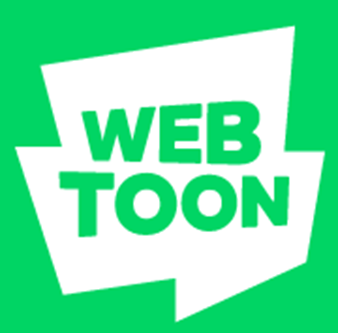

# 데이터 및 라이브러리 로딩

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np    
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('naver.csv')

# 데이터 설명

---



> **x**


*   title : 웹툰 제목
*   author : 작가
*   genre : 장르
*   describtion : 웹툰 소개
*   rating : 웹툰 평점
*   date : 최근 업데이트 날짜(완결 욉툰은 완결 날짜)
*   completed : 완결여부
*   age : 관람 제한 나이
*   free : 무료 여부
*   link : 웹툰 링크
*   previous(추가 column) : 작가의 전 작품의 개수(해당 작품이 나올 때 기준)
*   episode(추가 column) : 웹툰의 에피소드의 개수
*   remake(추가 column) : 원작 유무의 여부
*   heart(추가 column) : 웹툰이 받은 하트의 개수


> **y(target)**


*   interest_num(추가 column) : 관심웹툰으로 등록 한 사람의 수

**insight :**

*   완결된 웹툰을 대상으로 하기 때문에 completed가 True인 데이터만을 다룸
*   previous(추가 column) : 날짜 순 정렬 -> 작가 2명을 1명으로 만들기 -> 작가 이름이 나올때 마다 count+1 해준다
*   episode(추가 column) : 크롤링
*   remake(추가 column) : 개수가 적어서 직접 작성하여 merge
*   heart(추가 column) : 크롤링
*   interest_num(추가 column) : 크롤링




> **완결된 웹툰만을 뽑음**



In [ ]:
# 완결된 웹툰 
data=data[data["completed"]==True]



> **previous(추가 column) : 날짜 순 정렬 -> 작가 2명을 1명으로 만들기 -> 작가 이름이 나올때 마다 count+1 해준다**



In [ ]:
# 날짜별로 정렬
data=data.sort_values(by=['date'])

# 이름 두 명 중 한 명만 남기기('/'로 구분되어 있는 것을 나누고 첫 번째 사람만 남김 because 첫 번째 사람이 유명)
authors=[]
for author in data['author']:
  author=author.replace('/',',').split(',')
  authors.append(author[0])

# split()이 남긴 빈칸 없애기
for i in range(len(authors)):
  authors[i]=authors[i].strip()

# 'author'열을 한 명만 남긴 열로 대체
data['author']=authors

# 'previous'열을 만들어서 추가
# 'previous'열 : 작품이 나온 시점에서 전 작품의 수의 개수를 담음
authors_dic={}
previous=[]
for i in data['author']:
  if i not in authors_dic.keys():
    authors_dic[i]=0
  else :
    authors_dic[i] +=1
  previous.append(authors_dic[i])
data['previous']=previous

In [ ]:
# 기존 파일 내보내기(셀 실행x)
data.to_csv("naver_previous.csv")


> **remake(추가 column) : 전 작품이 있는 개수가 거의 없다 -> 파일을 다운 받아서 remake열을 만들어 remake작만 1을 넣고 다시 코랩으로 연다 -> null값에 0을 집어넣는다**

In [ ]:
# remake열을 만들고 remake작에 1 넣은 파일 다운받기
data=pd.read_csv('naver_remake.csv',encoding='cp949')

In [ ]:
# null값에 0넣기
data = data.fillna(0)

In [ ]:
# float형을 int형으로 변환
data = data.astype({'remake':'int'})

 **heart(추가 column) : 크롤링(동적 크롤링이라 beautifulsoup이 아니라 selenium사용해야함)**

*   사이트 : https://comic.naver.com/webtoon/list?titleId=786987
*   colab에서는 selenium이 내장되어 있지 않아서 따로 다운 받아야함
*   데이터에 link가 있어서 모든 link 크롤링 돌면 됨
*   중간중간에 읽을 수 없는 url이 있어서 timeout을 걸어놓고 timeout하면 for문을 넘어가는 형식으로 함
*   딕셔너리를 사용하여 기존 csv파일에 추가할 예정임
*   99999+가 있어서 범위를 나눠서 인코딩을 해야하한다

In [ ]:
# colab에서는 selenium이 없어서 다운받아야함
!pip install selenium 
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver/usr/bin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 30.8 MB/s 
     |████████████████████████████████| 384 kB 64.7 MB/s 
     |████████████████████████████████| 140 kB 65.5 MB/s 
     |████████████████████████████████| 58 kB 5.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.13 which is incompatible.


Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [22.9 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [1,307 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 h

In [ ]:
from selenium import webdriver # request모듈은 javascripts로 변형되기 전의 주소라서 제대로 못받아옴 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)
driver.implicitly_wait(10)

In [ ]:
heart={}
for url in data['link']:
  driver.get(url) # 각 url접속
  try:
    wait=WebDriverWait(driver, 5)
    name_info=wait.until(lambda x: x.find_element(By.XPATH,('//*[@id="content"]/div[1]/div[2]/h2/span[1]')))
    heart_info=wait.until(lambda x: x.find_element(By.XPATH,('//*[@id="content"]/div[1]/div[2]/ul/li[5]/div/a/em')))
    heart[name_info.text]=heart_info.text
    print(name_info.text,heart_info.text)
  except :
        continue


타투 113
와탕카 352
까뱅 51
사랑in 68
AA 117
도자기 2,233
펫다이어리 11,577
체스아일 185
구석구석캠페인 92
탐구생활2 69
식스센스 89
트라우마 6,452
제로 64
태왕광개토 127
취업의소리 99
에피소드메이비 280
개편 축하 릴레이 카툰 125
향수 3,107
와탕카2 134
반지의제왕 35
골방환상곡 4,848
3단합체김창남 11,928
N의등대-thecalling 2,501
내일은 럭키곰스타 2,820
N의등대-busted 3,869
N의등대-도망자 2,714
핑크레이디 21,052
창위의일루젼 59
탐구생활3 1,238
고향의꽃 1,503
슈퍼트리오 35
N의등대-눈의등대 7,394
고(故)노무현 前대통령 추모웹툰 977
사노라면 35
러브판타지페이퍼 3,847
플루타크 영웅전 186
번데기스 15
일편단심화 1,526
카라멜마끼아또 3,572
번개기동대 2009 25
로봇빠찌 30
나는 어디에 있는 거니 433
우월한 하루 10,803
새끼손가락 8,152
두근두근두근거려 9,094
연 401
고(故)길창덕화백 추모웹툰 78
펫다이어리2.런 6,352
색으로 말하다 309
악연 4,615
겨울동화 1,356
판타스틱 어른백서 20
탐구생활4-그대와 함께 하이킹 523
몽타주 691
17살, 그 여름날의 기적 2,045
연옥님이 보고계셔 1,236
스마일브러시 2,032
구름의 노래 5,358
낢에게와요 400
패밀리맨 2,206
싸우자귀신아 26,822
심장이뛰다 1,634
소설가J 3,683
피터팬날다 28
공부하기 좋은 날 12,934
의령수 135
증거 76
거상 김만덕 235
심부름센터 K 1,710
동경소녀 512
열아홉스물하나 18,048
안나라수마나라 27,151
미호이야기 10,476
키스우드 7,426
입시명문사립 정글고등학교 27,659
열쇠줍는아이 1,623
보톡스 636
그린스마일 1,449
힘내요 일본!-[릴레이웹툰] 225
핑크레이디 클래식 9,454
혜성같은 소년 614
흐드러지다 2

In [ ]:
# merge를 위하여 데이터 프레임으로 만들기
title_heart=pd.DataFrame({'title':heart.keys(), 'heart':heart.values()})
display(title_heart)
# merge
data=pd.merge(data,title_heart)

,title,heart
0,타투,113
1,와탕카,352
2,까뱅,51
3,사랑in,68
4,AA,117
...,...,...
1193,평범한 낙원,306
1194,웰컴 온보드,299
1195,귀곡의 문,"99,999+"
1196,관종교장,566


In [ ]:
# 혹시 몰라서 하트의 개수만 csv파일로 빼놓기
title_heart.to_csv("only heart.csv")

In [ ]:
# 왼쪽에 쓰레기열 제거
data=data.drop(['Unnamed: 0'],axis=1)

 **episode(추가 column) : 크롤링**

*   사이트 : https://series.naver.com/comic/categoryProductList.series?categoryTypeCode=webtoon&genreCode=&orderTypeCode=new&is&isFinished=true



In [ ]:
# 총 웹툰의 개수를 크롤링함
driver.get('https://series.naver.com/comic/categoryProductList.series?categoryTypeCode=webtoon&genreCode=&orderTypeCode=new&is&isFinished=true')
all_cnt_path='//*[@id="content"]/div/div/div[1]' # 총 개수가 쓰여져 있는 xpath
all_cnt=driver.find_element(By.XPATH,(all_cnt_path)).text
all_cnt=int(all_cnt[1]+all_cnt[3:6])



In [ ]:
# 모든 웬툰의 페이지 url을 크롤링함
import sys as s 
import time as t
urls=[]
cnt=1
page_url='https://series.naver.com/comic/categoryProductList.series?categoryTypeCode=webtoon&genreCode=&orderTypeCode=new&is&isFinished=true'

while 1:
  driver.get(page_url)
  
  for i in range(1,6):
    for j in range(1,6):
      wait=WebDriverWait(driver, 5)
      such_urls_path='//*[@id="content"]/div/ul['+str(i)+']/li['+str(j)+']/a'
      such_urls=wait.until(lambda x: x.find_element(By.XPATH,(such_urls_path)).get_attribute('href')) # href의 하이퍼링크를 가져오는 것이기 때문에 find한 것에 get_attribute사용
      urls.append(such_urls)
      print(such_urls, cnt)
      if cnt < all_cnt :
        cnt += 1
      else :
        s.exit()
  
  # 페이지 넘어가기
  
  nextpage_urls_path='//*[@id="content"]/p/span[2]/a'
  page_url=driver.find_element(By.XPATH,(nextpage_urls_path)).get_attribute('href')
  
  

  

In [ ]:
### 로그인 ###
driver.implicitly_wait(3)
driver.find_element(By.XPATH,('//*[@id="gnb_login_button"]')).click()


# 아이디
driver.find_element(By.XPATH,('//*[@id="id"]')).send_keys('gunwoof12')
driver.implicitly_wait(3)

# 비밀번호 입력
driver.find_element(By.XPATH,('//*[@id="pw"]')).send_keys('rjsdndi0625#')
driver.implicitly_wait(3)
driver.find_element(By.XPATH,('//*[@id="log.login"]')).click()

# cookie_dic={}
# cookie_contents=driver.get_cookies() # 쿠키정보
# for cookie in cookie_contents:
#   cookie_dic[cookie['name']]=cookie['value']

cookie_contents=driver.get_cookies()
s = requests.Session()
for cookie in cookie_contents:    
    s.cookies.set(cookie['name'], cookie['value'])

In [ ]:
episode={}
for url in urls:
  driver.get(url)
  try:
      wait=WebDriverWait(driver, 5)
      name_path='//*[@id="content"]/div[1]/h2' # 웹툰 이름 x_path
      name_info=wait.until(lambda x: x.find_element(By.XPATH,(name_path))).text
      if '[독점]' in name_info: 
        name_info=name_info[:-5]
      episode_path='//*[@id="content"]/h5/strong' # episode의 개수가 적혀있는 x_path
      episode_info=wait.until(lambda x: x.find_element(By.XPATH,(episode_path))).text
      episode[name_info]=episode_info
      print(name_info,episode_info)
  except :
        continue  

In [ ]:
# merge를 위하여 데이터 프레임으로 만들기
title_episode=pd.DataFrame({'title':episode.keys(), 'episode':episode.values()})
display(title_episode)
# merge
data=pd.merge(data,title_episode)

In [ ]:
# 혹시 몰라서 하트의 개수만 csv파일로 빼놓기
title_episode.to_csv("only_episode.csv")



> **interest_num(추가 column) : web에는 없고 app으로 틀었을 때만 있다 -> 어쩔 수 없는 노가다**





In [ ]:
interested_num=pd.read_csv("naver_interest_num.csv",encoding='cp949')

In [ ]:
interested_num=interested_num[['title','interest_num']]

In [ ]:
data=pd.merge(data,interested_num)

In [ ]:
data.to_csv("naver_all_add.csv")

# 데이터 탐색

In [ ]:
data=pd.read_csv("naver_all_add.csv")

In [ ]:
data=data.astype({'interest_num': 'int'}) # interest_num(추가 column) int로 바꾸기
data=data.drop(['Unnamed: 0'],axis=1) # 가장 왼쪽에 쓰래기열 지우기

In [ ]:
# age에 소수의 전체연령가가 0으로 되어있어 전처리
for i in range(len(data['age'])):
  if data['age'][i]=='0':
    data['age'][i]='전체연령가'

<ipython-input-35-35deedfb6862>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'][i]='전체연령가'


In [ ]:
data

,id,title,author,genre,description,rating,date,completed,age,free,link,previous,remake,heart,episode,interest_num
0,25695,향수,석우,"스토리, 스릴러","행복했었던 나의 어린 시절. 그러나, 그에게는 잔인한 기억일지도 모른다. 향수, 그...",9.93,2008.11.25 12:13,True,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=2...,0,0,"3,106",50,19940
1,26310,3단합체김창남,하일권,"스토리, 드라마",삼봉이발소의 하일권이 돌아왔다.본격 SF청춘만화,9.95,2008.12.26 09:58,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=2...,0,0,"11,928",27,83625
2,52993,우월한 하루,팀 겟네임,"스토리, 스릴러","교수인형의 팀 겟네임, 그들의 두번째 스릴러.평범한 한 남자의 평범하지 않은 하루....",9.94,2009.10.13 00:04,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=5...,0,0,"10,803",41,78613
3,65410,두근두근두근거려,하일권,"스토리, 드라마",‘3단 합체 김창남’의 하일권 신작.건조했던 일상이 두근두근 거리기 시작한다.,9.95,2009.12.02 00:04,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=6...,1,0,"9,094",32,82946
4,73352,연,구아진,"옴니버스, 스릴러","구아바 작가의 옴니버스 스릴러 ‘연’오늘, 지금, 당신에게도 일어날 수 있는 일들.",9.78,2010.02.02 10:40,True,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...,0,0,401,22,8337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,776093,이상형은 아닙니다,박윤영,"스토리, 로맨스",연애 경험치 만렙 29살 여자와 연애는 커녕 썸 한번 못 타본 모쏠 29년차 남자의...,9.61,2022.05.23 23:00,True,15세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...,1,0,793,46,126827
678,772192,평범한 낙원,후드새,"스토리, 스릴러",학교에서 매일 괴롭힘당하는 현서운은 하굣길에 이상한 시선을 느낀다.그리고 다음 날 ...,9.89,2022.05.25 22:59,True,15세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...,0,0,306,54,29553
679,718020,귀곡의 문,삼촌,"스토리, 드라마","귀신소굴로 유명한 삼도천동의 흉가,평범한(?) 세입자들의 일상 개그",9.98,2022.05.31 22:59,True,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...,1,0,"99,999+",190,196170
680,774088,관종교장,좌승훈,"스토리, 개그",전 재산을 가족 몰래 주식으로 날린 교장 정도만. 이제 은퇴까지 1년 밖에 남지 않...,9.93,2022.05.31 22:59,True,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...,0,0,565,49,50531


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            682 non-null    int64  
 1   title         682 non-null    object 
 2   author        682 non-null    object 
 3   genre         682 non-null    object 
 4   description   682 non-null    object 
 5   rating        682 non-null    float64
 6   date          682 non-null    object 
 7   completed     682 non-null    bool   
 8   age           682 non-null    object 
 9   free          682 non-null    bool   
 10  link          682 non-null    object 
 11  previous      682 non-null    int64  
 12  remake        682 non-null    int64  
 13  heart         682 non-null    object 
 14  episode       682 non-null    int64  
 15  interest_num  682 non-null    int64  
dtypes: bool(2), float64(1), int64(5), object(8)
memory usage: 76.1+ KB


**insight :**

*   str형(object) : title, author, genre, description, date, age, link
*   int형 : id, previous(추가 column), episode(추가 column), heart(추가 column), interest_num(추가 column)
*   float형 : rating
*   boolean : completed, free, remake(추가 column)

# 데이터 분석(EDA)

>  **주관적 분석**

*   id, title, date, description, completed(완료된거 한정이기 때문), link는 아무리 생각해도 관객수와 관련이 없어 보이다 -> 제거 확정!!

In [ ]:
data=data.drop(['id','title','date','description','completed','link','author','genre','age','remake'],axis=1)

>  **author은 너무 많아서 나중에 고려 -> 일단 뺌**

In [ ]:
plt.figure(figsize=(100, 20))
plt.xlabel('저자', fontsize=20)
plt.ylabel('개수', fontsize=500)
plt.hist(data['author'])


In [ ]:
#data['author'].value_counts()

In [ ]:
#data=data.drop(['author'],axis=1)



> **genre 인코딩**



*   **(스토리, 무협)(옵니버스, 무협)와 멜로, 무협 같은 세부장르 뿐만아니라 스토리와 옵니버스도 두 가지로 나눠진다 -> genre를 열 두개로 쪼갠다**




In [ ]:
genre1=[]
genre2=[]
for i in data['genre']:
  genre1.append(i.split(',')[0])
  genre2.append(i.split(',')[1])

data['genre1']=genre1
data['genre2']=genre2
data=data.drop(['genre'],axis=1)
data=data[['genre1','genre2','rating','age','free','previous','remake','heart','episode','interest_num']]

*  **label incording -> sklearn의 LabelEncoder 모듈 사용**(one hot과 더불어 Frequency, Target Encoding도 고려)

*  label incording


> **label incording의 문제점 :** 숫자값을 가중치로 잘못 인식하여 값에 왜곡 
-> 이러한 특성은 예측 성능의 저하를 일으킨다.

> **label incording의 해결 :** 레이블 인코딩은 선형회귀와 같은 ML알고리즘에는 보통 적용하지 않는다. 하지만 트리계열의 ML알고리즘은 숫자의 ordinal 특성을 반영하지 않으므로 레이블 인코딩도 별 문제 없다.


---

*  one hot incording

> **one hot incording의 문제점 :** 다중공선성


> **label incording의 해결 :** 
1.   상관관계 높은 열을 제거
2.   pca(주성분 분석)



In [ ]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(data['genre1'])
data['genre1']=encoder.transform(data['genre1'])
encoder.fit(data['genre2'])
data['genre2']=encoder.transform(data['genre2'])

In [ ]:
display(data['genre1'].value_counts())
print('\n')
display(data['genre2'].value_counts())

In [ ]:
# 원 핫 인코딩
from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder(sparse=False)

encoder.fit(data['genre1'].values.reshape(-1,1))
one_hot1=encoder.transform(data['genre1'].values.reshape(-1,1))
one_hot1=pd.DataFrame(one_hot1, columns=['genre1_' + col for col in list(encoder.categories_)])
data=pd.concat([data.drop(columns=['genre1']),one_hot1],axis=1)

encoder.fit(data['genre2'].values.reshape(-1,1))
one_hot2=encoder.transform(data['genre2'].values.reshape(-1,1))
one_hot2=pd.DataFrame(one_hot2, columns=['genre2_' + col for col in list(encoder.categories_)])
data=pd.concat([data.drop(columns=['genre2']),one_hot2],axis=1)


>  **age 인코딩**


*   **label incording -> sklearn의 LabelEncoder 모듈 사용**
(one hot 고려)

In [ ]:
data

In [ ]:
data['age'].value_counts()

In [ ]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(data['age'])
data['age']=encoder.transform(data['age'])

In [ ]:
# 원 핫 인코딩
from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder(sparse=False)

encoder.fit(data['age'].values.reshape(-1,1))
one_hot1=encoder.transform(data['age'].values.reshape(-1,1))
one_hot1=pd.DataFrame(one_hot1, columns=['age_' + col for col in list(encoder.categories_)])
data=pd.concat([data.drop(columns=['age']),one_hot1],axis=1)

>  **free 인코딩**

*   **label incording -> sklearn의 LabelEncoder 모듈 사용** (one hot 고려)

In [ ]:
data['free'].value_counts()

True     496
False    186
Name: free, dtype: int64

In [ ]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(data['free'])
data['free']=encoder.transform(data['free'])

In [ ]:
# 원 핫 인코딩
from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder(sparse=False)

data = data.astype({'free':'str'}) # boolean에서 string으로 바꿔야 one-hot 가능

encoder.fit(data['free'].values.reshape(-1,1))
one_hot1=encoder.transform(data['free'].values.reshape(-1,1))
one_hot1=pd.DataFrame(one_hot1, columns=['free_' + col for col in list(encoder.categories_)])
data=pd.concat([data.drop(columns=['free']),one_hot1],axis=1)

**heart 정규화**



In [ ]:
# 하트에 '좋아요'라고 있던 행 지우기
data=data[data['heart']!='좋아요']

In [ ]:
# 중간에 행 지워서 인덱스 중간에 빔 -> 인덱스 초기화
data.reset_index(inplace=True,drop=True)

In [ ]:
# 하트

for i in range(len(data['heart'])):
  data['heart'][i]=data['heart'][i].rstrip('+').split(',')
  data['heart'][i]="".join(data['heart'][i])

# 하트 정수형으로 변환 
data = data.astype({'heart':'int'})

<ipython-input-42-52ac6bb992e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heart'][i]="".join(data['heart'][i])
<ipython-input-42-52ac6bb992e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heart'][i]=data['heart'][i].rstrip('+').split(',')


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data['heart'].values.reshape(-1,1))
scaled_heart = scaler.transform(data['heart'].values.reshape(-1,1))
scaled_heart = pd.DataFrame(scaled_heart,columns=['scaled_heart'])
data=pd.concat([data.drop(columns=['heart']),scaled_heart],axis=1)

In [ ]:
data

**rating 정규화**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data['rating'].values.reshape(-1,1))
scaled_rating = scaler.transform(data['rating'].values.reshape(-1,1))
scaled_rating = pd.DataFrame(scaled_rating,columns=['scaled_rating'])
data=pd.concat([data.drop(columns=['rating']),scaled_rating],axis=1)

**episode 정규화**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data['episode'].values.reshape(-1,1))
scaled_episode	 = scaler.transform(data['episode'].values.reshape(-1,1))
scaled_episode	 = pd.DataFrame(scaled_episode	,columns=['scaled_episode	'])
data=pd.concat([data.drop(columns=['episode']),scaled_episode],axis=1)

In [ ]:
# 데이터 열 정리
data=pd.concat([data.drop(columns=['interest_num']), data['interest_num']],axis=1)

In [ ]:
data.corr()

,free,previous,scaled_heart,scaled_rating,scaled_episode\t,interest_num
free,1.000000,0.055363,0.186681,0.035050,0.079988,0.149750
previous,0.055363,1.000000,0.068218,0.044512,0.048320,0.095509
scaled_heart,0.186681,0.068218,1.000000,0.179987,0.292544,0.536404
scaled_rating,0.035050,0.044512,0.179987,1.000000,0.017756,0.110019
scaled_episode\t,0.079988,0.048320,0.292544,0.017756,1.000000,0.454465
interest_num,0.149750,0.095509,0.536404,0.110019,0.454465,1.000000


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


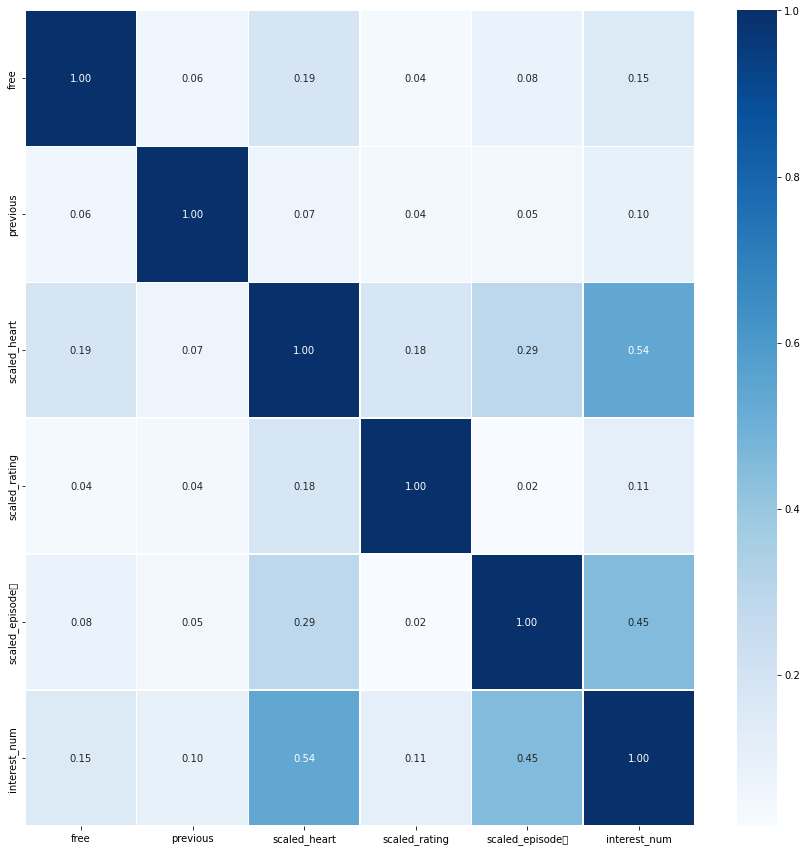

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

# 모델 만들기

In [ ]:
from sklearn.model_selection import train_test_split

x=data.drop(['interest_num'],axis=1)
y=data['interest_num']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# 단일 회귀
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# 앙상블
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
model = LinearRegression()

model.fit(train_x, train_y)
pred = model.predict(test_x)
MAE = np.sqrt(mean_absolute_error(pred, test_y))
print('MAE',MAE)

MAE 288.333599401284


In [ ]:
model = Ridge()

model.fit(train_x, train_y)
pred = model.predict(test_x)
MAE = np.sqrt(mean_absolute_error(pred, test_y))
print('MAE',MAE)

MAE 290.05082850150814


In [ ]:
model = Lasso()

model.fit(train_x, train_y)
pred = model.predict(test_x)
MAE = np.sqrt(mean_absolute_error(pred, test_y))
print('MAE',MAE)

MAE 288.3364353962343


In [ ]:
model = RandomForestRegressor()

model.fit(train_x, train_y)
pred = model.predict(test_x)
MAE = np.sqrt(mean_absolute_error(pred, test_y))
print('MAE',MAE)

MAE 283.13376291203764


In [ ]:
model = XGBRegressor()

model.fit(train_x, train_y)
pred = model.predict(test_x)
MAE = np.sqrt(mean_absolute_error(pred, test_y))
print('MAE',MAE)

[14:50:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE 287.21427991552173


In [ ]:
model = LGBMRegressor()

model.fit(train_x, train_y)
pred = model.predict(test_x)
MAE = np.sqrt(mean_absolute_error(pred, test_y))
print('MAE',MAE)

MAE 280.5441704766332
